Alphavantage Intraday
API for "real time" stock data
Freeium model - sign up fro free account to get API key
Can make API calls directly or install the helper library:
pip install alpha_vantage from the command line
https://alphavantage.co

In [1]:
#1. Set up Environment
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [2]:
#2. Store API Key
key = open('../Quantitative Stock Price Analysis with Python, pandas, NumPy matplotlib & SciPy/AlphavantageIntradayapikey.txt').read()

In [3]:
#3. Create TimeSeries Object and Make API Call
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')

In [4]:
#4. Examine Data
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2023-08-09 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20160 entries, 2023-08-09 19:59:00 to 2023-07-12 04:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    20160 non-null  float64
 1   2. high    20160 non-null  float64
 2   3. low     20160 non-null  float64
 3   4. close   20160 non-null  float64
 4   5. volume  20160 non-null  float64
dtypes: float64(5)
memory usage: 945.0 KB


In [6]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-08-09 19:59:00,242.01,242.03,241.90,242.005,6614.0
2023-08-09 19:58:00,241.99,242.08,241.95,242.015,3573.0
2023-08-09 19:57:00,241.97,242.08,241.94,242.000,6539.0
2023-08-09 19:56:00,242.02,242.03,241.85,241.960,4898.0
2023-08-09 19:55:00,242.19,242.19,241.95,241.970,6722.0


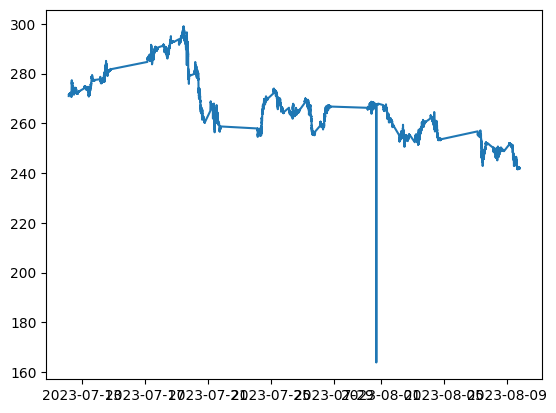

In [7]:
plt.plot(data['4. close'])

In [8]:
#5. Rename Columns and Add Separate Date and Time Columns
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [9]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [10]:
data.loc['2023-08-09']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-08-09 19:59:00,242.01,242.03,241.90,242.005,6614.0,2023-08-09,19:59:00
2023-08-09 19:58:00,241.99,242.08,241.95,242.015,3573.0,2023-08-09,19:58:00
2023-08-09 19:57:00,241.97,242.08,241.94,242.000,6539.0,2023-08-09,19:57:00
2023-08-09 19:56:00,242.02,242.03,241.85,241.960,4898.0,2023-08-09,19:56:00
2023-08-09 19:55:00,242.19,242.19,241.95,241.970,6722.0,2023-08-09,19:55:00
...,...,...,...,...,...,...,...
2023-08-09 04:04:00,251.72,251.78,251.63,251.700,1758.0,2023-08-09,04:04:00
2023-08-09 04:03:00,251.99,252.20,251.72,251.780,5892.0,2023-08-09,04:03:00
2023-08-09 04:02:00,251.54,252.12,251.50,252.000,5966.0,2023-08-09,04:02:00


In [11]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8211 entries, 2023-07-12 09:30:00 to 2023-08-09 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       8211 non-null   float64
 1   high       8211 non-null   float64
 2   low        8211 non-null   float64
 3   close      8211 non-null   float64
 4   volume     8211 non-null   float64
 5   TradeDate  8211 non-null   object 
 6   time       8211 non-null   object 
dtypes: float64(5), object(2)
memory usage: 513.2+ KB


In [12]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2023-07-12,271.460,276.520
2023-07-13,270.600,279.450
2023-07-14,276.310,285.300
2023-07-17,283.570,292.230
2023-07-18,286.010,295.260
2023-07-19,289.520,299.290
2023-07-20,261.200,280.930
2023-07-21,255.800,268.000
2023-07-24,254.120,269.850


In [13]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-07-12 11:57:00,271.540,271.978,271.460,271.945,366019.0,2023-07-12,11:57:00
2023-07-13 10:37:00,270.751,271.150,270.600,271.140,385526.0,2023-07-13,10:37:00
2023-07-14 09:31:00,277.020,277.280,276.310,276.740,482868.0,2023-07-14,09:31:00
2023-07-17 11:02:00,283.949,283.990,283.570,283.740,536063.0,2023-07-17,11:02:00
2023-07-18 10:32:00,286.070,286.460,286.010,286.440,438215.0,2023-07-18,10:32:00
2023-07-19 14:50:00,289.910,290.200,289.520,289.775,515225.0,2023-07-19,14:50:00
2023-07-20 15:25:00,261.780,261.990,261.200,261.816,660137.0,2023-07-20,15:25:00
2023-07-21 10:40:00,256.530,257.340,255.800,257.210,1036195.0,2023-07-21,10:40:00
2023-07-24 09:30:00,255.850,256.580,254.120,255.120,1970225.0,2023-07-24,09:30:00


In [14]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-07-12 09:30:00,276.325,276.520,275.110,275.160,1423409.0,2023-07-12,09:30:00
2023-07-13 15:37:00,278.985,279.450,278.970,279.450,384740.0,2023-07-13,15:37:00
2023-07-14 12:53:00,284.770,285.300,284.630,285.120,1211005.0,2023-07-14,12:53:00
2023-07-17 09:36:00,291.469,292.230,291.200,291.590,1345521.0,2023-07-17,09:36:00
2023-07-18 15:52:00,294.920,295.260,294.900,294.950,558552.0,2023-07-18,15:52:00
2023-07-19 11:36:00,298.818,299.290,298.650,298.961,848893.0,2023-07-19,11:36:00
2023-07-20 09:34:00,279.664,280.930,279.480,280.272,1410537.0,2023-07-20,09:34:00
2023-07-21 09:30:00,268.000,268.000,266.430,266.430,1765865.0,2023-07-21,09:30:00
2023-07-24 14:01:00,269.250,269.850,269.230,269.680,472565.0,2023-07-24,14:01:00
